### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [13]:
# Top 10 missing data
missing_data = data.isnull().sum()
print("Missing data per column:")
print(missing_data.sort_values(ascending=False).head(10))

# Top 10 Percentage of missing data
missing_percentage = (missing_data / len(data)) * 100
print("\nPercentage of missing data:")
print(missing_percentage.sort_values(ascending=False).head(10))



Missing data per column:
CoffeeHouse             217
Restaurant20To50        189
CarryAway               151
RestaurantLessThan20    130
Bar                     107
destination               0
income                    0
direction_opp             0
direction_same            0
toCoupon_GEQ25min         0
dtype: int64

Percentage of missing data:
CoffeeHouse             1.710817
Restaurant20To50        1.490066
CarryAway               1.190476
RestaurantLessThan20    1.024913
Bar                     0.843582
destination             0.000000
income                  0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
dtype: float64


3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
# Drop cols > 50% of missing data
columns_to_drop = [col for col in missing_data.index if missing_percentage[col] > 50]
print(f"columns > 50% missing data to be dropped: {columns_to_drop}")
data = data.drop(columns=columns_to_drop)


# Fill missing values with 'NA'
data = data.fillna('NA')

# check if all data is good

print(data.isnull().sum())

columns > 50% missing data to be dropped: []
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [15]:
# Get the mean of accepted coupons
proportion_accepted = data['Y'].mean()
print(f"The proportion of total observations that accepted the coupon: {proportion_accepted:.2f}")


The proportion of total observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

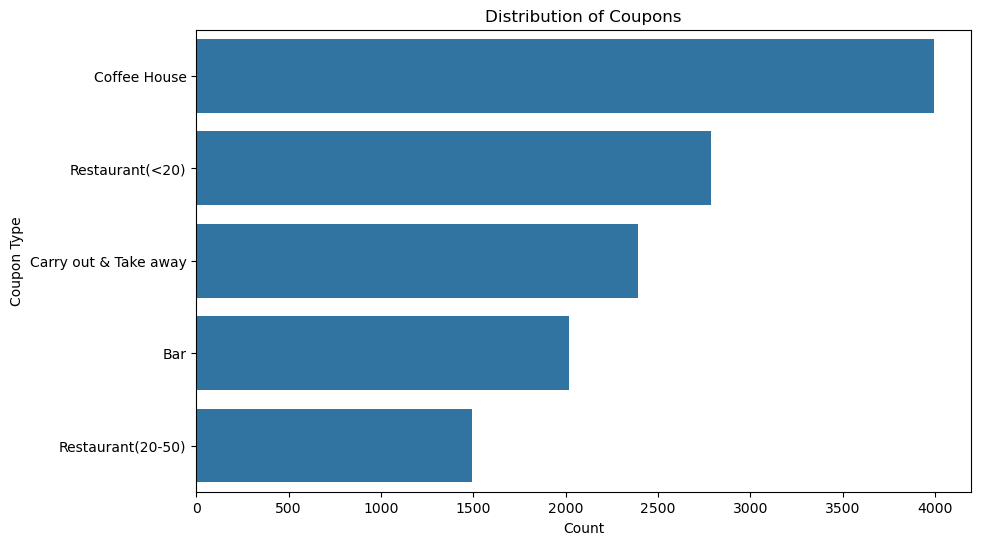

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(y='coupon', data=data, order=data['coupon'].value_counts().index)
plt.title('Distribution of Coupons')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.show()

6. Use a histogram to visualize the temperature column.

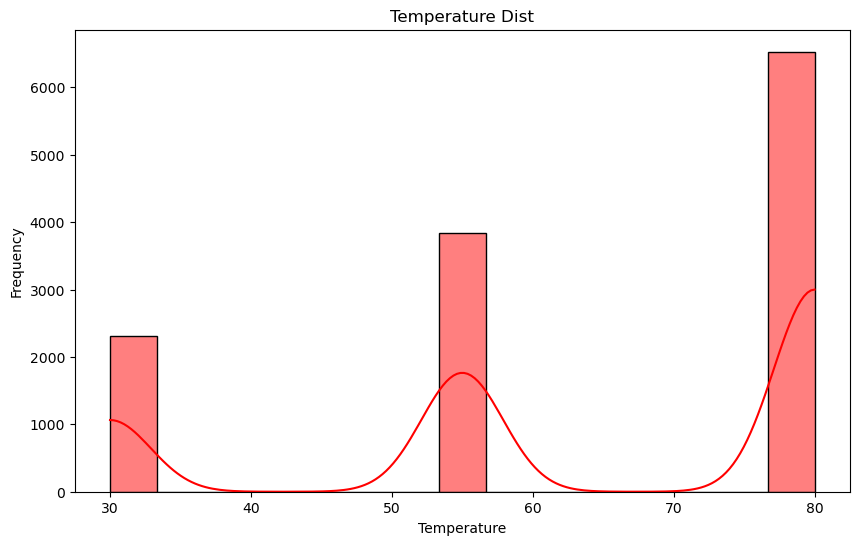

In [19]:
# Histogram for the 'temperature' column
plt.figure(figsize=(10,6))
sns.histplot(data['temperature'], bins=15, kde=True, color='red')
plt.title('Temperature Dist')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
bar_coupons = data[data['coupon'] == 'Bar'].head(10)
print(bar_coupons)

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   
61             Work      Alone   Sunny           55   7AM    Bar         1d   
75  No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never        NA   


2. What proportion of bar coupons were accepted?


In [27]:
# Calculate the proportion of accepted bar coupons

bar_coupons_accepted = bar_coupons['Y'].mean()
print(f"The proportion of bar coupons that were accepted is: {bar_coupons_accepted:.2f}")



The proportion of bar coupons that were accepted is: 0.50


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [31]:
# fewer_than_3
fewer_than_3 = bar_coupons[bar_coupons['Bar'] <= '3']
more_than_3 = bar_coupons[bar_coupons['Bar'] > '3']

# acceptance rates
acceptance_fewer_than_3 = fewer_than_3['Y'].mean()
acceptance_more_than_3 = more_than_3['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_fewer_than_3:.2f} and Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_more_than_3:.2f}")



Acceptance rate for those who went to a bar 3 or fewer times a month: nan and Acceptance rate for those who went to a bar more than 3 times a month: 0.50


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [33]:
# Age >25
over_25_more_than_once = bar_coupons[(bar_coupons['Bar'] > '1') & (bar_coupons['age'].astype(int) > 25)]
all_others = bar_coupons[~((bar_coupons['Bar'] > '1') & (bar_coupons['age'].astype(int) > 25))]

#  acceptance rates
acceptance_over_25_more_than_once = over_25_more_than_once['Y'].mean()
acceptance_all_others = all_others['Y'].mean()

print(f"Acceptance rate for drivers over 25 who go to a bar more than once a month: {acceptance_over_25_more_than_once:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_all_others:.2f}")


Acceptance rate for drivers over 25 who go to a bar more than once a month: 0.25
Acceptance rate for all other drivers: 0.67


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [34]:
# no kids group
no_kids_group = bar_coupons[(bar_coupons['Bar'] > '1') &(bar_coupons['passanger'] != 'Kid(s)') & (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))]

# other group
other_group = bar_coupons[~((bar_coupons['Bar'] > '1') & (bar_coupons['passanger'] != 'Kid(s)') & (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry'])))]

#  acceptance rates
acceptance_criteria_group = no_kids_group['Y'].mean()
acceptance_other_group = other_group['Y'].mean()

print(f"Acceptance rate for drivers meeting the condition: {acceptance_criteria_group:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_other_group:.2f}")


Acceptance rate for drivers meeting the condition: 0.50
Acceptance rate for all other drivers: 0.50


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [35]:
# Group a: go to bars more than once a month, had passengers not a kid, and were not widowed
group_a = bar_coupons[(bar_coupons['Bar'] > '1') &(bar_coupons['passanger'] != 'Kid(s)') &(bar_coupons['maritalStatus'] != 'Widowed')]

# Group b: go to bars more than once a month and are under the age of 30
group_b = bar_coupons[(bar_coupons['Bar'] > '1') &(bar_coupons['age'].astype(int) < 30)]

# Group c: go to cheap restaurants more than 4 times a month and income is less than 50K
group_c = bar_coupons[(bar_coupons['RestaurantLessThan20'] > '4') & (bar_coupons['income'] < '$50K')]

# Calculate acceptance rates
acceptance_group_a = group_a['Y'].mean()
acceptance_group_b = group_b['Y'].mean()
acceptance_group_c = group_c['Y'].mean()

# Print the results
print(f"Acceptance rate for Group a: {acceptance_group_a:.2f}")
print(f"Acceptance rate for Group b: {acceptance_group_b:.2f}")
print(f"Acceptance rate for Group c: {acceptance_group_c:.2f}")


Acceptance rate for Group a: 0.50
Acceptance rate for Group b: 0.67
Acceptance rate for Group c: 0.33


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [38]:
# There is a pattern in the drivers who accepted the coupons
    # -> Low Income drivers looking to save money are using the coupons 
    # -> Younger demographic of age <25 are accepting the coupon 
    # -> There are many >1 visits to the bar, that suggest returning customers who values the coupon
    

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [42]:
# Coffee House coupon group
coffee_house_coupons = data[data['coupon'] == 'Coffee House']
coffee_house_coupons.head(10)



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,0,0,0,1,0
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,1,1,0,1,1
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,1,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0


In [43]:
# acceptance rate
coffee_acceptance_rate = coffee_house_coupons['Y'].mean()
print(f"Overall acceptance rate for Coffee House coupons: {coffee_acceptance_rate:.2f}")


Overall acceptance rate for Coffee House coupons: 0.50


In [44]:
# group by passenger type
coffee_passenger_acceptance = coffee_house_coupons.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate for Coffee House coupons by passenger type:")
print(coffee_passenger_acceptance)


Acceptance rate for Coffee House coupons by passenger type:
passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64


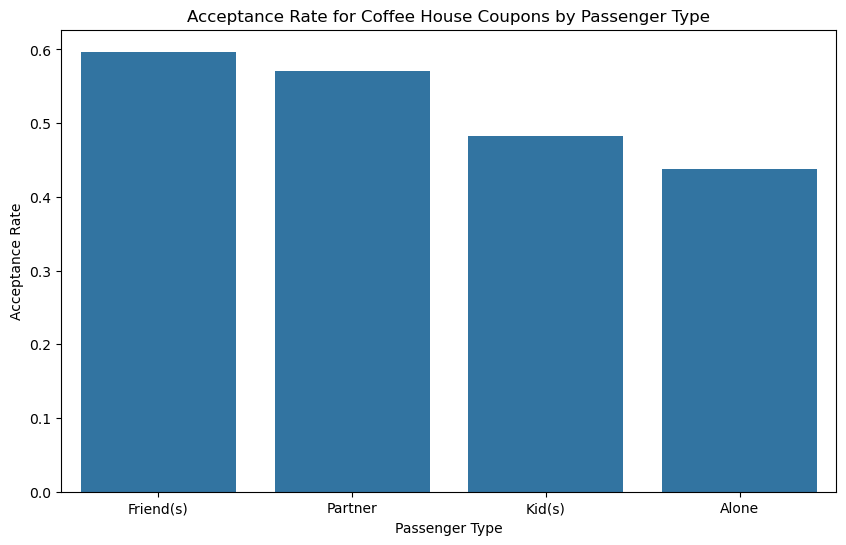

In [45]:
#Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=coffee_passenger_acceptance.index, y=coffee_passenger_acceptance.values)
plt.title('Acceptance Rate for Coffee House Coupons by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.show()


In [47]:
##Overall Acceptance Rates
overall_acceptance_rate = data['Y'].mean() * 100

# Print the result
print(f"Overall acceptance rate: {overall_acceptance_rate:.2f}%")


Overall acceptance rate: 56.84%


In [48]:
# Accepted vs. Rejected Coupons

In [51]:
# Acceptance rate by coupon type
acceptance_by_coupon = data.groupby('coupon')['Y'].mean() * 100
print("Acceptance rate by coupon type:")
print(acceptance_by_coupon)
print("\n")

# Acceptance rate by age
acceptance_by_age = data.groupby('age')['Y'].mean() * 100
print("Acceptance rate by age:")
print(acceptance_by_age)
print("\n")

# Acceptance rate by income
acceptance_by_income = data.groupby('income')['Y'].mean() * 100
print("Acceptance rate by income:")
print(acceptance_by_income)
print("\n")

# Acceptance rate by passenger type
acceptance_by_passenger = data.groupby('passanger')['Y'].mean() * 100
print("Acceptance rate by passenger type:")
print(acceptance_by_passenger)
print("\n")




Acceptance rate by coupon type:
coupon
Bar                      41.001487
Carry out & Take away    73.547848
Coffee House             49.924925
Restaurant(20-50)        44.101877
Restaurant(<20)          70.710696
Name: Y, dtype: float64


Acceptance rate by age:
age
21         59.819073
26         59.593591
31         54.634625
36         53.525398
41         57.273559
46         57.580175
50plus     50.894855
below21    63.436929
Name: Y, dtype: float64


Acceptance rate by income:
income
$100000 or More     57.834101
$12500 - $24999     57.454943
$25000 - $37499     59.314456
$37500 - $49999     56.398892
$50000 - $62499     59.553948
$62500 - $74999     52.718676
$75000 - $87499     48.308051
$87500 - $99999     53.184358
Less than $12500    59.309021
Name: Y, dtype: float64


Acceptance rate by passenger type:
passanger
Alone        52.580424
Friend(s)    67.343845
Kid(s)       50.497018
Partner      59.534884
Name: Y, dtype: float64


